# Bounding Box

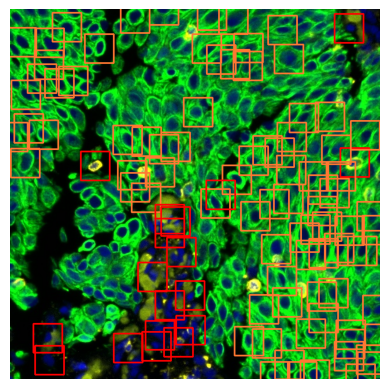

In [19]:
import cv2
import matplotlib.pyplot as plt

name = '0'

# Define the image path
image_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/yolo/Three_Classes/Train/images/18_roi_{name}.jpg'

# Read the image
image = cv2.imread(image_path)

# Define the text file path
text_file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/Annotations/18_roi_{name}.txt'

# Define colors based on the first number in each line of the text file
colors = {
    '0': (0, 0, 255),  # #00ffff
    '1': (50, 120, 255),  # #ff00ff
    '2': (0, 0, 255)     # #ff0000
}

# Read the text file with bounding box coordinates
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Assuming your image has dimensions 640x480
        image_width, image_height = 640, 640

        # Convert normalized coordinates to absolute coordinates
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height

        # Calculate the coordinates for the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Get the color based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to blue if label is not 0, 1, or 2

        # Draw the bounding box on the image with the selected color
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

# Display the image with colored bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# New Datasets

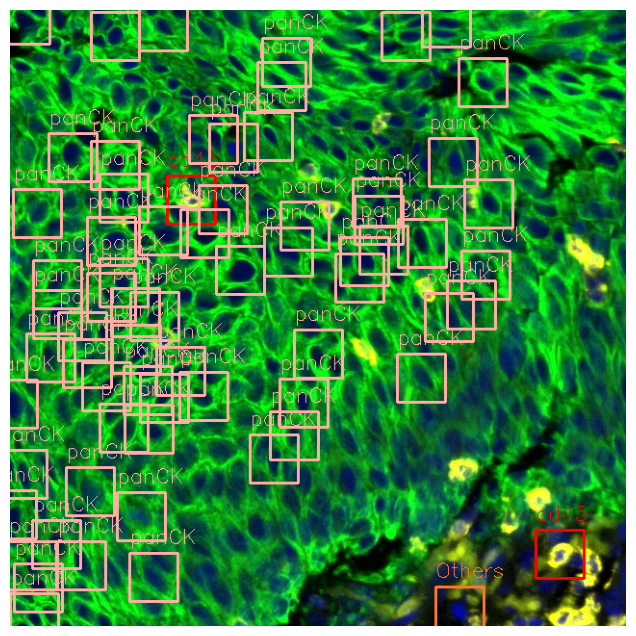

In [37]:
import cv2
import matplotlib.pyplot as plt

name = '56'

# Define the image path
image_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs_all/images/18_roi_{name}.jpg'

# Read the image
image = cv2.imread(image_path)

# Define the text file path
text_file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs_all/labels/18_roi_{name}.txt'

# Define colors based on the first number in each line of the text file
colors = {
    '0': (0, 0, 255),  # #00ffff
    '1': (163, 174, 255),  # #ff00ff
    '2': (50, 120, 255)     # #ff0000
}

texts = {
    '0': 'cd45',
    '1': 'panCK',
    '2': 'Others'
}

# Read the text file with bounding box coordinates
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Assuming your image has dimensions 640x480
        image_width, image_height = 640, 640

        # Convert normalized coordinates to absolute coordinates
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height

        # Calculate the coordinates for the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Get the color and text based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to blue if label is not 0, 1, or 2
        text = texts.get(str(int(label)), 'Unknown')      # Default to 'Unknown' if label is not in texts

        # Draw the bounding box on the image with the selected color
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Text parameters
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_color = color  # Use the same color as the box
        font_thickness = 1
        text_position = (x1, y1 - 10)  # Position the text above the top left corner of the box

        # Draw the text
        cv2.putText(image, text, text_position, font, font_scale, font_color, font_thickness)
        
plt.figure(figsize=(8, 8))  # You can adjust these values as needed
        
# Display the image with colored bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# Yolov8

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.219 🚀 Python-3.11.5 torch-2.1.0 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 143.6/926.4 GB disk)


In [2]:
# Train YOLOv8n on COCO8 for 3 epochsA2977240923
!yolo train model=yolov8n.pt data="/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/yolo/Three_Classes/config.yaml" epochs=50 imgsz=640 batch=8

Ultralytics YOLOv8.0.219 🚀 Python-3.11.5 torch-2.1.0 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/yolo/Three_Classes/config.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train49, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

      34/50         0G      2.116      2.232      1.546        295        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         51       2206      0.269      0.478      0.283       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      35/50         0G      1.715      1.995      1.369        300        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         51       2206      0.262      0.468      0.282      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      36/50         0G      1.628      2.353       1.25         83        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         51       2206      0.265      0.467       0.28      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      37/5

In [3]:
!yolo predict model=/Users/yshokrollahi/AI_single-cell/runs/detect/train49/weights/best.pt imgsz=640 source="/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/yolo/Three_Classes/Train/images/18_roi_0.jpg"


Ultralytics YOLOv8.0.219 🚀 Python-3.11.5 torch-2.1.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/yolo/Three_Classes/Train/images/18_roi_0.jpg: 640x640 7 cd45s, 53 panCKs, 63.4ms
Speed: 1.1ms preprocess, 63.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# Train YOLOv8n on COCO8 for 3 epochsA2977240923
!yolo train model=yolov8n.pt data="config.yaml" epochs=200 imgsz=640 batch-size 16

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='config.yaml', epochs=100, imgsz=640, batch=16)